In [ ]:
!pip install pyupbit

In [ ]:
import time
import pyupbit
import datetime

In [ ]:
access = "key"
secret = "key"

In [ ]:
# 로그인
upbit = pyupbit.Upbit(access, secret)

# 2017-09-25 ~ 현재 -> 약 1690개

In [ ]:
ticker = "KRW-BTC"
df = pyupbit.get_ohlcv(ticker, interval="day", count=3650)

In [ ]:
df_org = df.copy()

In [ ]:
df.head()

,open,high,low,close,volume,value
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08


# stationary(price) -> non-stationary(price_diff)

In [ ]:
df["open_diff"] = df["open"] - df["open"].shift(1)
df["high_diff"] = df["high"] - df["high"].shift(1)
df["low_diff"] = df["low"] - df["low"].shift(1)
df["close_diff"] = df["close"] - df["close"].shift(1)

In [ ]:
df.head()

,open,high,low,close,volume,value,open_diff,high_diff,low_diff,close_diff
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,NaN,NaN,NaN,NaN
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,116000.0,85000.0,136000.0,-1000.0
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,5000.0,259000.0,7000.0,336000.0
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,335000.0,95000.0,201000.0,-71000.0
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,-71000.0,-63000.0,-43000.0,71000.0


In [ ]:
df2 = df[["open_diff", "high_diff", "low_diff", "close_diff", "volume", "close"]]
df2.head()

,open_diff,high_diff,low_diff,close_diff,volume,close
2017-09-25 09:00:00,NaN,NaN,NaN,NaN,132.484755,4322000.0
2017-09-26 09:00:00,116000.0,85000.0,136000.0,-1000.0,22.788340,4321000.0
2017-09-27 09:00:00,5000.0,259000.0,7000.0,336000.0,32.269662,4657000.0
2017-09-28 09:00:00,335000.0,95000.0,201000.0,-71000.0,80.588243,4586000.0
2017-09-29 09:00:00,-71000.0,-63000.0,-43000.0,71000.0,59.352373,4657000.0


# Smoothing by Moving Average

이동평균선 plot

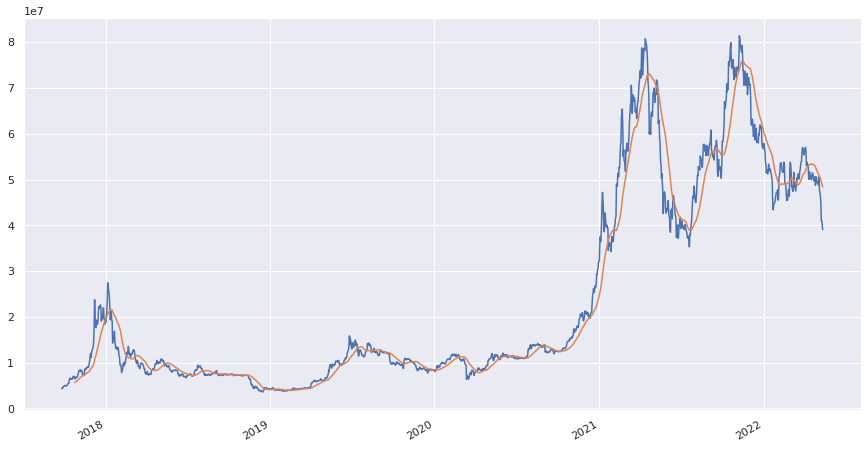

In [ ]:
df2["close"].plot(figsize=(15, 8))
df2["close"].rolling(window=30).mean().plot() # 30일 이동평균선

In [ ]:
df2["close_MA30"] = df2["close"].rolling(window=30).mean()
df2.head()

,open_diff,high_diff,low_diff,close_diff,volume,close,close_MA30
2017-09-25 09:00:00,NaN,NaN,NaN,NaN,132.484755,4322000.0,NaN
2017-09-26 09:00:00,116000.0,85000.0,136000.0,-1000.0,22.788340,4321000.0,NaN
2017-09-27 09:00:00,5000.0,259000.0,7000.0,336000.0,32.269662,4657000.0,NaN
2017-09-28 09:00:00,335000.0,95000.0,201000.0,-71000.0,80.588243,4586000.0,NaN
2017-09-29 09:00:00,-71000.0,-63000.0,-43000.0,71000.0,59.352373,4657000.0,NaN


In [ ]:
df2["close_diff_ma5"] = df2["close_diff"].rolling(window=5).mean()
df2["close_diff_ma10"] = df2["close_diff"].rolling(window=10).mean()
df2["close_diff_ma20"] = df2["close_diff"].rolling(window=20).mean()
df2["close_diff_ma60"] = df2["close_diff"].rolling(window=60).mean()
df2["close_diff_ma120"] = df2["close_diff"].rolling(window=120).mean()

In [ ]:
df = df2[["close_diff_ma5", "close_diff_ma10", "close_diff_ma20", "close_diff_ma60", "close_diff_ma120", "close"]]
df

,close_diff_ma5,close_diff_ma10,close_diff_ma20,close_diff_ma60,close_diff_ma120,close
2017-09-25 09:00:00,NaN,NaN,NaN,NaN,NaN,4322000.0
2017-09-26 09:00:00,NaN,NaN,NaN,NaN,NaN,4321000.0
2017-09-27 09:00:00,NaN,NaN,NaN,NaN,NaN,4657000.0
2017-09-28 09:00:00,NaN,NaN,NaN,NaN,NaN,4586000.0
2017-09-29 09:00:00,NaN,NaN,NaN,NaN,NaN,4657000.0
...,...,...,...,...,...,...
2022-05-08 09:00:00,-801400.0,-581000.0,-303450.0,-113333.333333,-61433.333333,44770000.0
2022-05-09 09:00:00,-1922800.0,-872900.0,-522800.0,-131916.666667,-88966.666667,41002000.0
2022-05-10 09:00:00,-1320200.0,-823700.0,-517100.0,-121150.000000,-85000.000000,41046000.0
2022-05-11 09:00:00,-1348200.0,-909300.0,-525750.0,-136833.333333,-100141.666667,40290000.0


# 1691 - 120 = 1571

In [ ]:
df = df.dropna()
df_drop = df
df.head()

,close_diff_ma5,close_diff_ma10,close_diff_ma20,close_diff_ma60,close_diff_ma120,close
2018-01-23 09:00:00,-347800.0,-799400.0,-387950.0,65766.666667,73491.666667,13141000.0
2018-01-24 09:00:00,-384400.0,-575600.0,-497600.0,59516.666667,76075.000000,13450000.0
2018-01-25 09:00:00,-777000.0,-613300.0,-723550.0,43816.666667,69300.000000,12973000.0
2018-01-26 09:00:00,-352800.0,-140300.0,-702400.0,26033.333333,69083.333333,12876000.0
2018-01-27 09:00:00,-208800.0,-205100.0,-647950.0,14200.000000,68691.666667,12900000.0


In [ ]:
len(df)

1571

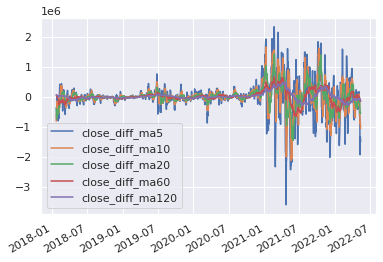

In [ ]:
df[["close_diff_ma5", "close_diff_ma10", "close_diff_ma20", "close_diff_ma60", "close_diff_ma120"]].plot.line()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# inverse transform
def restore(row):
  return row * (max(df_drop["close"]) - min(df_drop["close"])) + min(df_drop["close"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ["close_diff_ma5", "close_diff_ma10", "close_diff_ma20", "close_diff_ma60", "close_diff_ma120", "close"]
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])

In [ ]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('close', 1), df['close'], test_size=0.2, random_state=0, shuffle=False)

# train set 80% -> 1571 * 0.8 = 1256.8 -> 1256 data


In [ ]:
x_train.shape, y_train.shape

((1256, 5), (1256,))

# test set 20% -> 1571 * 0.2 = 314.2 -> 315 data

In [ ]:
x_test.shape, y_test.shape

((315, 5), (315,))

In [ ]:
x_train.tail()

,close_diff_ma5,close_diff_ma10,close_diff_ma20,close_diff_ma60,close_diff_ma120
1251,0.679118,0.429591,0.516141,0.193904,0.216800
1252,0.634650,0.488492,0.525583,0.197222,0.234642
1253,0.653125,0.543456,0.469783,0.164597,0.201959
1254,0.723653,0.527389,0.462632,0.139527,0.197387
1255,0.661924,0.609175,0.424170,0.129865,0.162268


In [ ]:
y_train.tail()

1251    0.467525
1252    0.467191
1253    0.487362
1254    0.476383
1255    0.458976
Name: close, dtype: float64

In [ ]:
len(y_train)

1256

In [ ]:
x_test.tail()

,close_diff_ma5,close_diff_ma10,close_diff_ma20,close_diff_ma60,close_diff_ma120
1566,0.469827,0.404725,0.394821,0.414919,0.282367
1567,0.280797,0.327590,0.318679,0.400687,0.247067
1568,0.382375,0.340591,0.320657,0.408933,0.252153
1569,0.377655,0.317972,0.317655,0.396921,0.232740
1570,0.354224,0.282139,0.311563,0.393998,0.208584


In [ ]:
y_test.tail()

1566    0.529042
1567    0.480600
1568    0.481166
1569    0.471447
1570    0.455775
Name: close, dtype: float64

In [ ]:
len(y_test)

315

In [ ]:
df2 = df_org
df2.tail()

,open,high,low,close,volume,value
2022-05-08 09:00:00,46507000.0,46515000.0,44624000.0,44770000.0,4109.819440,1.866181e+11
2022-05-09 09:00:00,44763000.0,45037000.0,40719000.0,41002000.0,8307.106093,3.564437e+11
2022-05-10 09:00:00,41000000.0,43110000.0,40150000.0,41046000.0,12076.374930,5.019668e+11
2022-05-11 09:00:00,41044000.0,43980000.0,39088000.0,40290000.0,31967.297187,1.328765e+12
2022-05-12 09:00:00,40263000.0,41178000.0,37000000.0,39071000.0,17638.860062,6.862129e+11


TensorFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     39/Unknown - 3s 10ms/step - loss: 0.0260 - mse: 0.0519
Epoch 1: val_loss improved from inf to 0.08425, saving model to tmp/ckeckpointer.ckpt
39/39 [==============================] - 3s 26ms/step - loss: 0.0260 - mse: 0.0519 - val_loss: 0.0843 - val_mse: 0.1685
Epoch 2/50
34/39 [=========================>....] - ETA: 0s - loss: 0.0053 - mse: 0.0105
Epoch 2: val_loss improved from 0.08425 to 0.00402, saving model to tmp/ckeckpointer.ckpt
39/39 [==============================] - 1s 14ms/step - loss: 0.0051 - mse: 0.0102 - val_loss: 0.0040 - val_mse: 0.0080
Epoch 3/50
33/39 [========================>.....] - ETA: 0s - loss: 7.2995e-04 - mse: 0.0015
Epoch 3: val_loss improved from 0.00402 to 0.00156, saving model to tmp/ckeckpointer.ckpt
39/39 [==============================] - 1s 11ms/step - loss: 6.8669e-04 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0031
Epoch 4/50
34/39 [=========================>....] - ETA: 0s - loss: 5.1959e-04 - mse: 0.0010
Epoch 4: val_loss improv

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

pred: test set - 20(window size)  = 314 - 20 = 294


In [ ]:
pred.shape

(295, 1)

예측 데이터 시각화


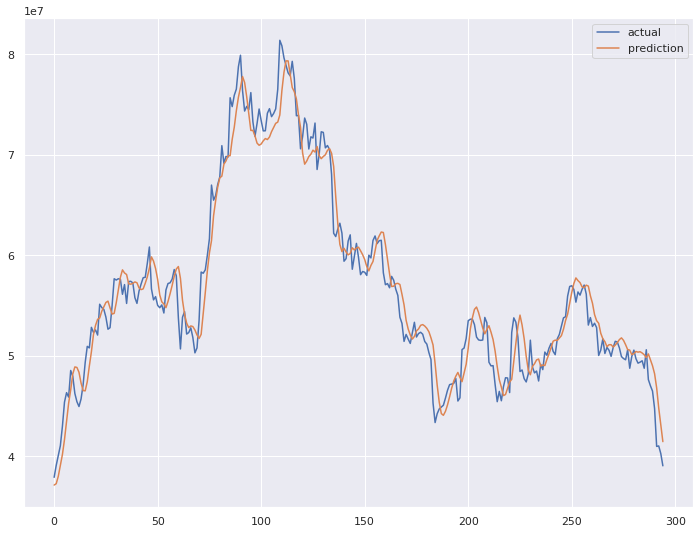

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(restore(np.asarray(y_test)[20:]), label='actual')
plt.plot(restore(pred), label='prediction')
plt.legend()
plt.show()

In [ ]:
df_actu = df_org[-len(pred):]
df_actu.tail()

,open,high,low,close,volume,value
2022-05-08 09:00:00,46507000.0,46515000.0,44624000.0,44770000.0,4109.819440,1.866181e+11
2022-05-09 09:00:00,44763000.0,45037000.0,40719000.0,41002000.0,8307.106093,3.564437e+11
2022-05-10 09:00:00,41000000.0,43110000.0,40150000.0,41046000.0,12076.374930,5.019668e+11
2022-05-11 09:00:00,41044000.0,43980000.0,39088000.0,40290000.0,31967.297187,1.328765e+12
2022-05-12 09:00:00,40263000.0,41178000.0,37000000.0,39071000.0,17638.860062,6.862129e+11


In [ ]:
df_actu["pred"] = restore(pred)
df_actu = df_actu[["close", "pred"]]
df_actu.tail()

,close,pred
2022-05-08 09:00:00,44770000.0,48232984.0
2022-05-09 09:00:00,41002000.0,46827220.0
2022-05-10 09:00:00,41046000.0,44827548.0
2022-05-11 09:00:00,40290000.0,43160780.0
2022-05-12 09:00:00,39071000.0,41477088.0
